### PROJECT TEAM ID : " PTID-CDS-JUL-23-1578 "

### PROJECT ID : " PRCP-1009-CellphonePrice - Cell phone Price Range "

## Buisness Case:  
**Predicting the price range of the mobile phones considering the different features given in the data**

# PROBLEM STATEMENT

Task 1:-Prepare a complete data analysis report on the given data.

Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled ,
wifi ,Bluetooth, Ram etc predict the Price range of the mobile.

Task 3:- Prepare the analysis report stating how model will help expanding the
business by stating several factors including feature importance.

# IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# LOAD DATASET

In [2]:
data=pd.read_csv('datasets_11167_15520_train.csv')
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


## Domain Analysis

######  0) battery_power :
* The capacity of a battery is measured in milliampere-hours (or mAh), which indicates how much energy the battery can deliver over time. The common size ranges from 2,000 mAh up to 10,000 mAh or even more than that. A bigger number indicates more power.

###### 1) blue:
* Bluetooth is a wireless protocol that uses radio frequency for exchanging data over short distances. It specifies whether the cell phone has Bluetooth or not.

###### 2) clock_speed:
* The clock speed determines the speed at which the microprocessor executes instructions. A processor with a 1-Gigahertz (GHz) clock speed can process 1 billion instructions per second. The expensive phones have higher clock speeds which make it work faster.

###### 3) dual_sim: 
* This specifies whether a device is capable of supporting two SIM cards. The two major types of dual-SIM phones are active and standby.

###### 4) fc: 
* It specifies the front camera megapixels.

###### 5) four_g: 
* 4G is the fourth generation of mobile phone technology, following 2G and 3G.4G makes it easier to access the internet on mobile.It specifies whether the cell phone has 4G or not.

###### 6) int_memory:
* Internal memory in Gigabytes is the space you get by default on a phone for the storage of media and files.

###### 7) m_dep: 
* Mobile depth in cm.

###### 8) mobile_wt:
* Weight of mobile phone.

###### 9) n_cores:
* A processor,also known as CPU, consists of multiple cores: Dual, Quad, Hexa, and Octa core. Processor cores distribute the work that comes in when you use your phone.It specifices the number of cores of processor.

###### 10) pc:
* Primary camera is the main camera refers to the rear-facing camera system.It specifies about the primary camera megapixels

###### 11) px_height:
* Pixel resolution refers to the number of pixels on a display or in a camera sensor specifically in a digital image.It specifies the pixel resolution height.

###### 12) px_width:
* It specifies the pixel resolution width.

###### 13) ram: 
* RAM(Random Access Memory) is the part of the phone that is used to store the operating system (OS) and where apps and data currently in use are kept.It specifies the RAM in Megabytes.

###### 14) sc_h: 
* It specifies the screen height of mobile in cm.

###### 15) sc_w:
* It specifies the screen width of mobile in cm.

###### 16) talk_time: 
* Talk time is the longest time that a single battery charge will last when you are constantly talking on the phone.

###### 17) three_g:
* 3G is the third generation of wireless mobile telecommunications technology.It specifies whether the cell phone has 3G or not.

###### 18) touch_screen:
* A touch screen is a cellphone display screen that also acts as an input device.It specifies whether the cell phone has touch screen or not.

###### 19) wifi: 
* Wi-Fi is a WLAN (Wireless Local Area Network) technology. It provides short-range wireless high-speed data connections between mobile data devices (such as laptops,phones) and nearby Wi-Fi access points. It specifies whether the cell phone has wifi or not.

###### 20) price_range:
* This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).'''

# BASIC CHECK

In [3]:
data.head((pd.set_option('display.max_columns',None)))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [4]:
data.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [5]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [6]:
data.shape

(2000, 21)

* Observation: There are 2000 observation and 21 columns

In [7]:
data.size

42000

In [8]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
data.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [10]:
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- NO MISSING VALUES

# Task 1
**Prepare a complete data analysis report on the given data.**

In [12]:
# Display basic statistics of the dataset
print(data.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0

## Exploratory data analysis

In [13]:
# To check the column names
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [14]:
# Creating a new dataframe with only continuous variables
data1=data[['battery_power', 'clock_speed', 'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']]

In [15]:
data1

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,336,670,869,18,10,19


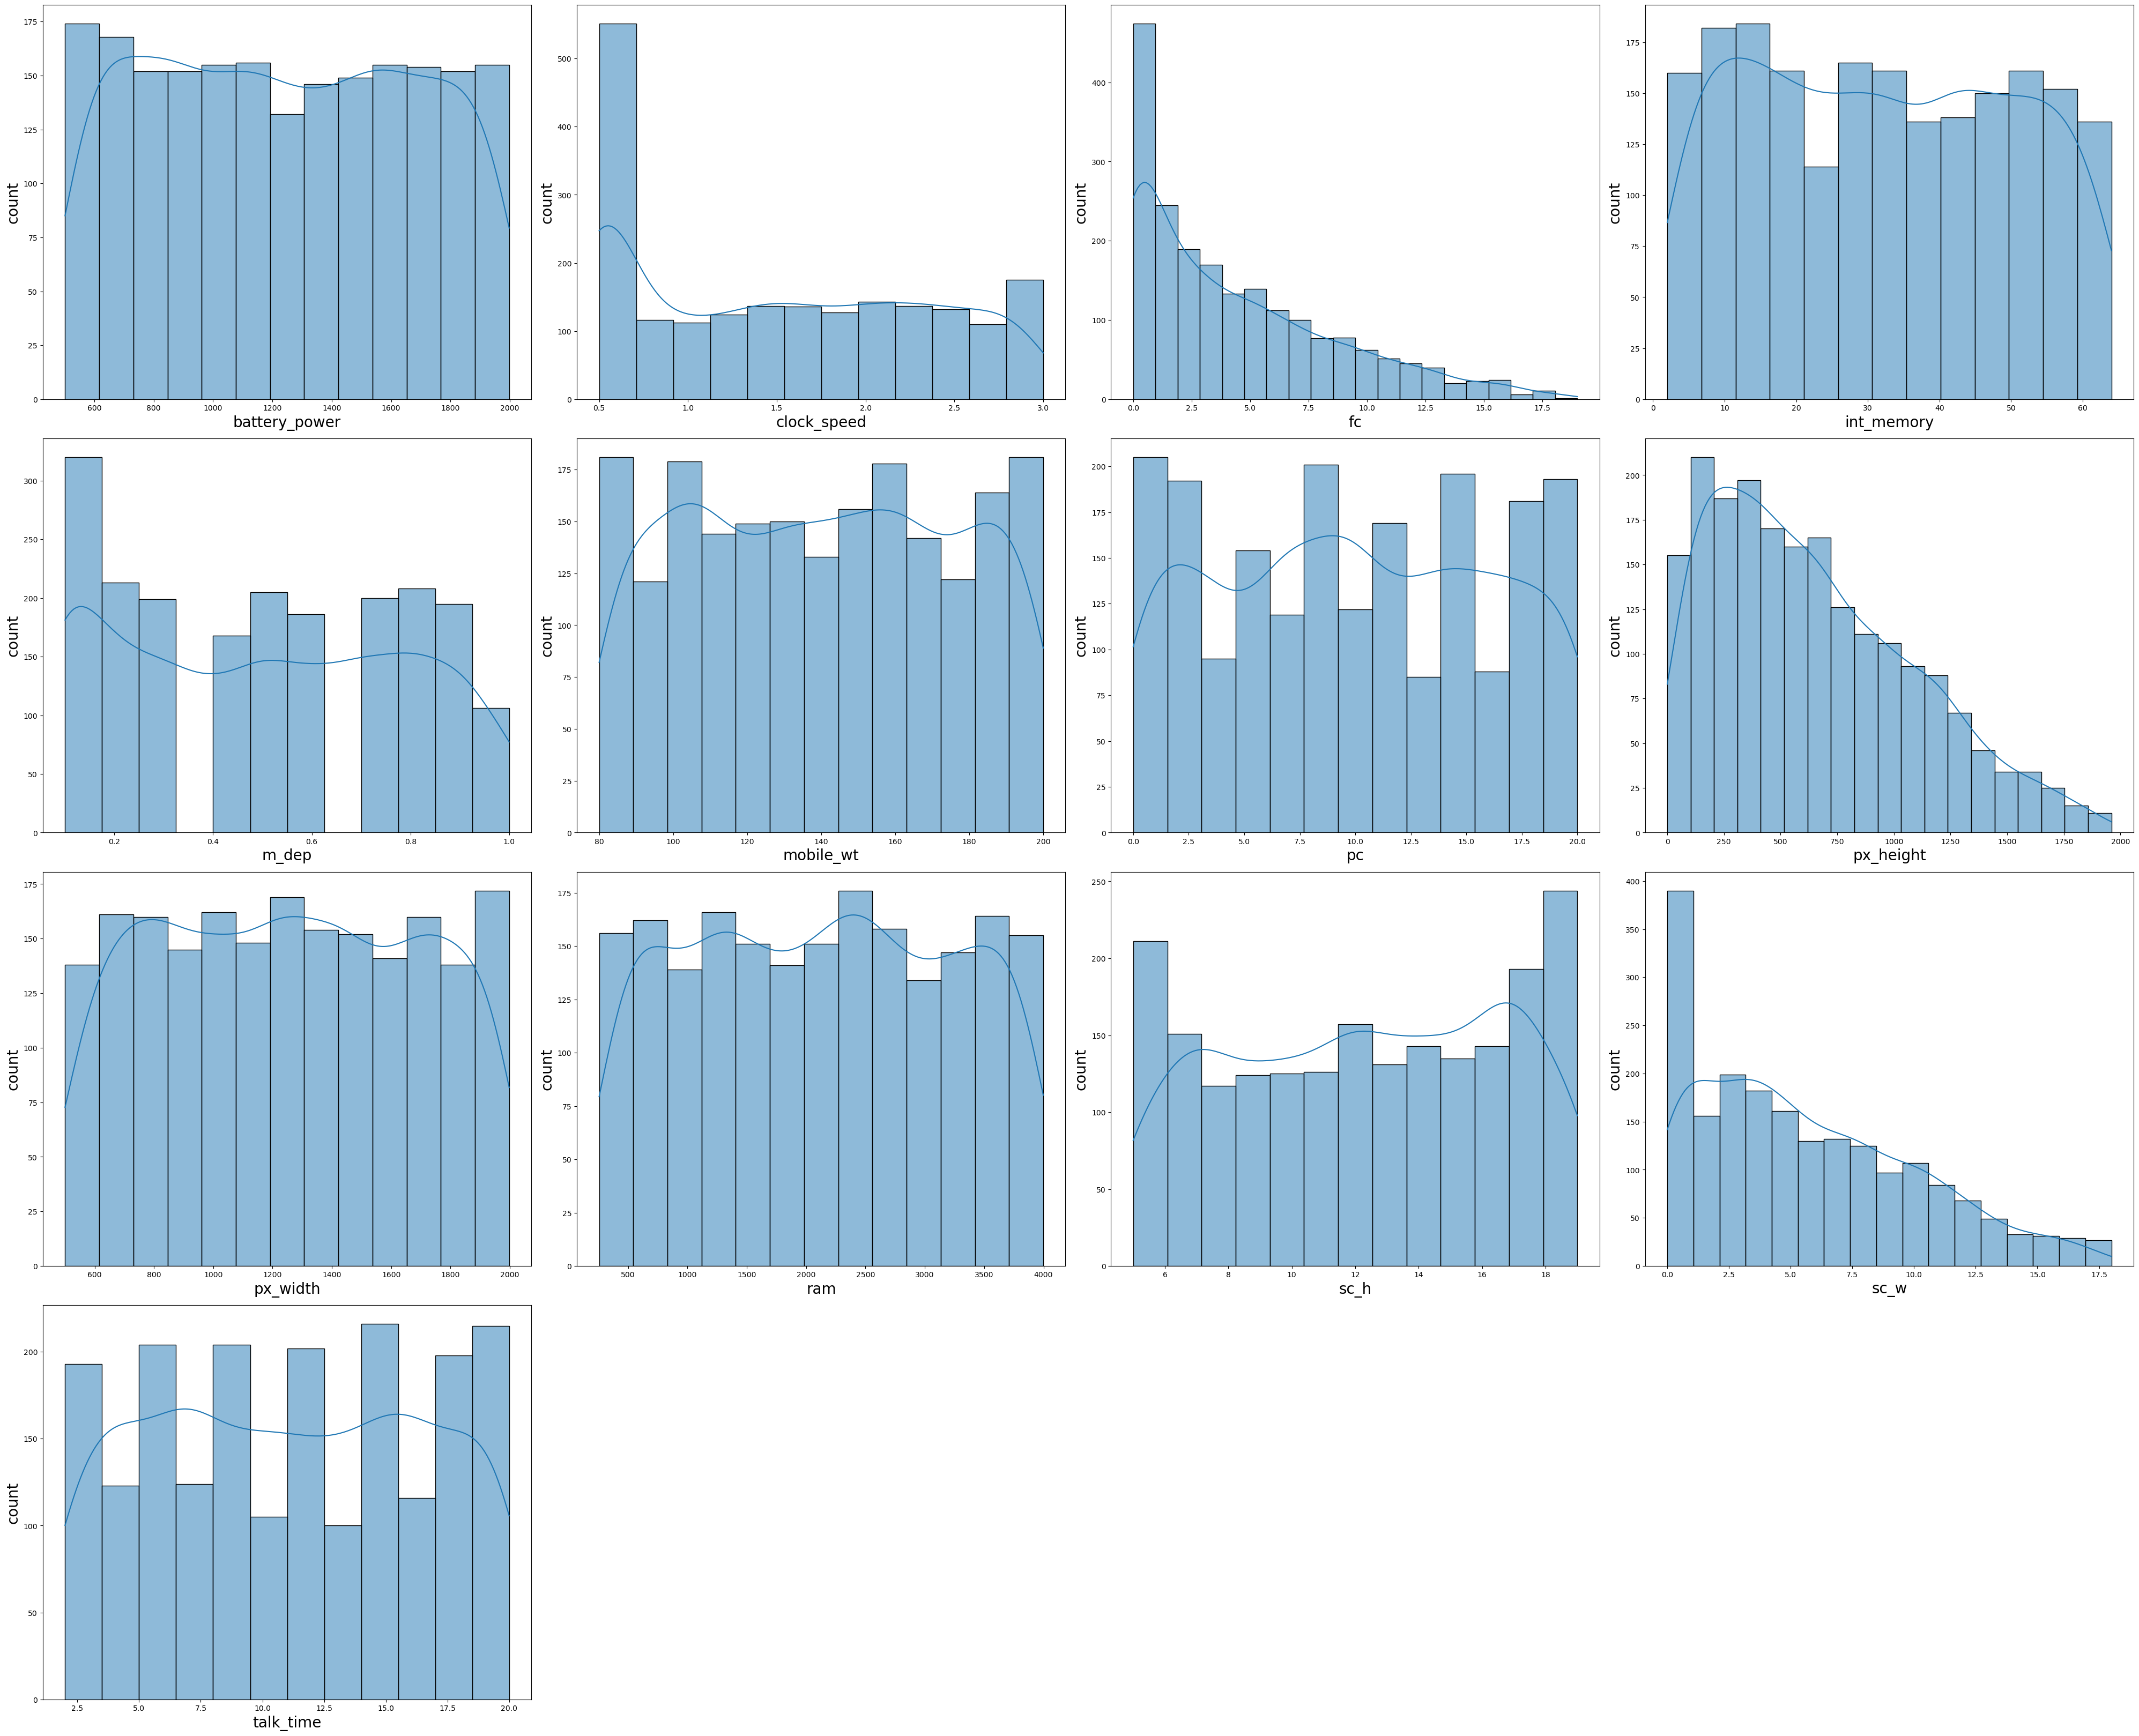

In [16]:
#Plotting each  continuous feature against count variable to check the relation

plt.figure(figsize=(40,40),facecolor='white')
plotnumber=1
for column in data1:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.histplot(x=data1[column],kde=True)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Insights

## Insights for battery power

* The battery power between 500 to 620 mAh has more counts compared to others.
* The counts is less for the battery power between 1200 to 1300 (approx).
* The highest count of the battery power is 173(approx).
* The lowest count of the battery power is 130(approx).

## Insights for clock speed

* The clock speed between 0.5 to 0.65 has more counts.
* The count of the clock speed is less between
* The highest count of clock speed is 560(approx).
* The lowest count of the clock speed is 2.6 to 2.8(approx).

## Insights for fc

* fc has more counts between 0 to 1.
* fc has least counts between 16.2-17.3(approx).
* The highest count of fc is 500(approx).
* The lowest value of fc is 9(approx).
* Approximately more the value of fc there is decrease in the number of counts.

## Insights for internal memory

* The internal memory between 11.8 to 16 has more counts compared to others.
* The internal memory between 21.7 to 26 has least counts compared to others

## Insights for mobile dept

* The more count is between 0.1 to 0.18
* It has least count between 0.95 to 1.0
* Insights for mobile weight

## Insights for mobile weight

* There are 4 mobile weights which has almost same counts which is the highest they are between 80 to 90, 99 to 140, 156 to 162 and 190 to 200.
* There are 2 mobile weights which has almost same counts which is the least they are between 90 to 99, 172 to 182.

## Insights for Primary camera mega pixels

* It has the highest count at 0 to 2.
* It has the lowest count at 12.4 to 13.8

## Insights for pixel height

* The highest count is between 100 to 200.
* And least count is between 1900 to 1990.

## Insights for pixel width

* The pixel width between 1900 to 2000 has more counts.

## Insights for ram

* Between 2300 to 2550 ram has more counts.
* It has least counts between 2800 to 3150.

## Insights for screen height

* The screen height between 18 to 19 has more counts.
* The screen height between 7.2 to 8.2

## Insights for screen width

* The count for screen width is more between 0.0 to 1.5
* The count for screen width is less between 17.2 to 18.0

## Insights for talk time

* More count is between 14 to 15.5 for talk time.
* Least count is between 12.5 to 14 for talk time.

In [17]:
# creating a newdataframe with only discrete variables
data2=data[['blue','dual_sim', 'four_g','three_g','touch_screen','wifi']]
data2

,blue,dual_sim,four_g,three_g,touch_screen,wifi
0,0,0,0,0,0,1
1,1,1,1,1,1,0
2,1,1,1,1,1,0
3,1,0,0,1,0,0
4,1,0,1,1,1,0
...,...,...,...,...,...,...
1995,1,1,1,1,1,0
1996,1,1,0,1,1,1
1997,0,1,1,1,1,0
1998,0,0,1,1,1,1


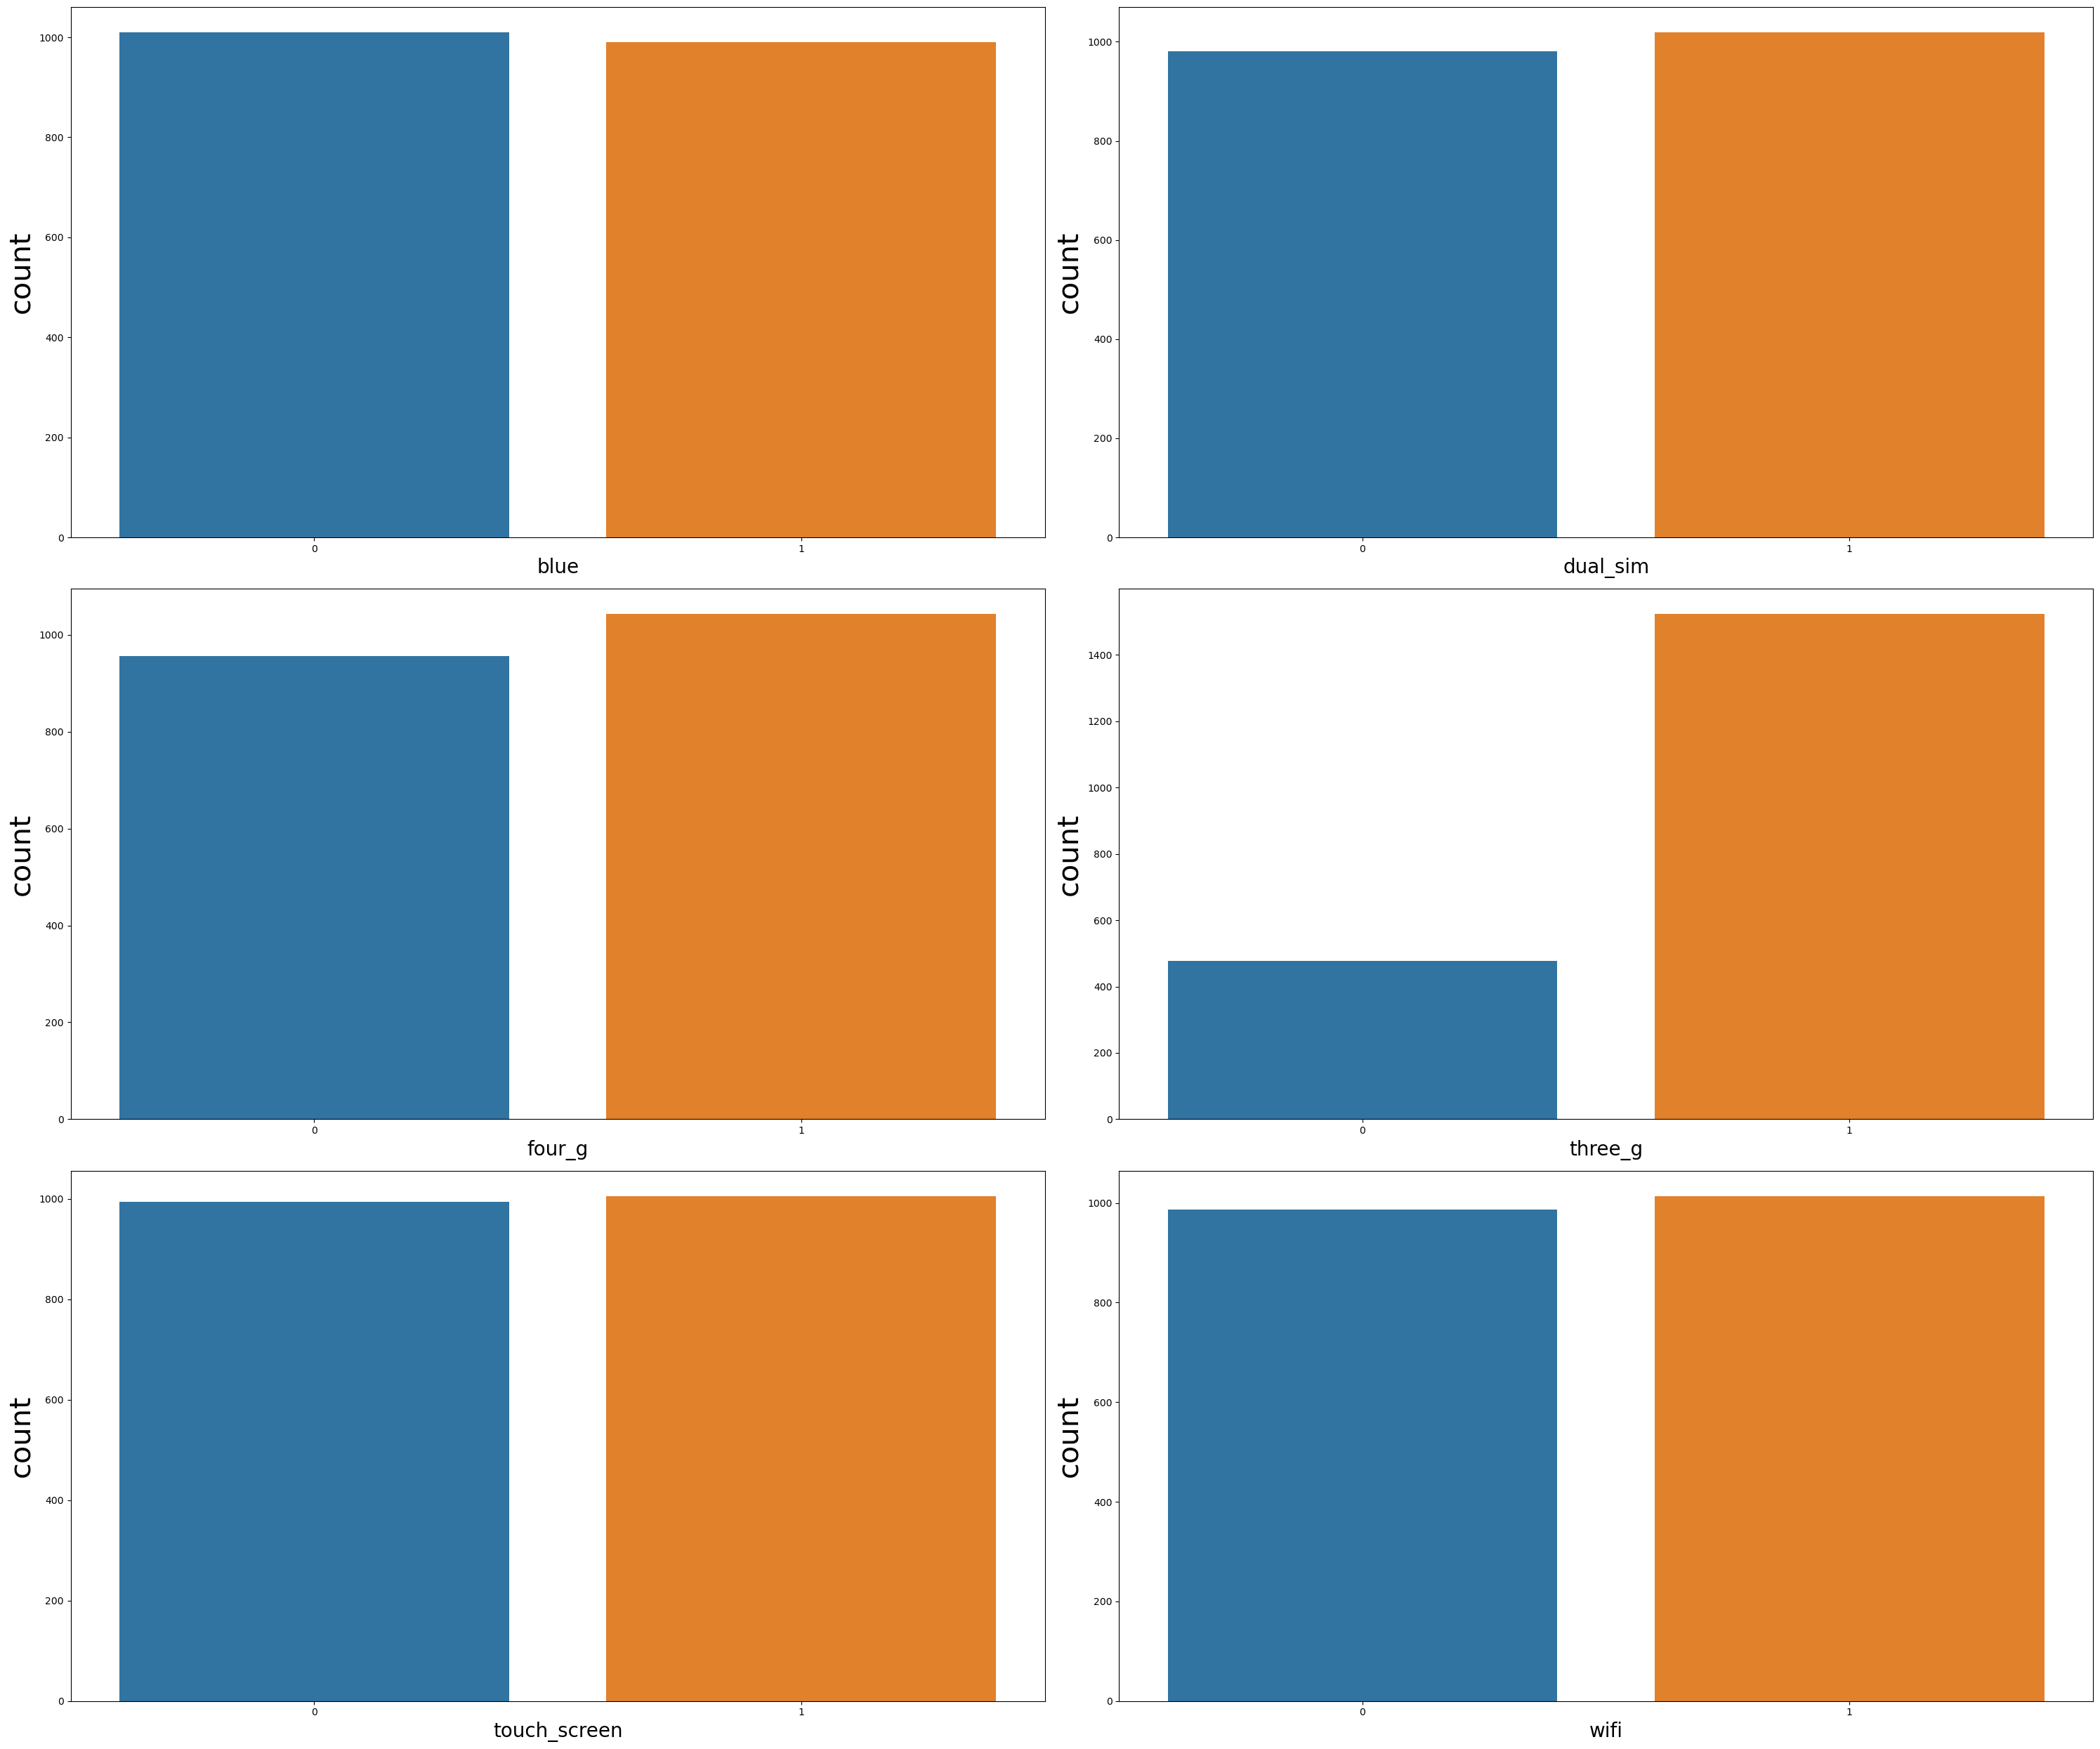

In [18]:
# Plotting each discrete variable against count variable 
plt.figure(figsize=(30,25),facecolor='white')
plotnumber=1
for column in data2:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.countplot(x=data2[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=30)
    plotnumber+=1
plt.tight_layout()

## Insights

* The count of mobile phones which doesnot have bluetooth is more than half and the ones with bluetooth is nearly half.
* Phones which have a feature of dual sim tend to get sold more than the one without this feature
* The number of mobiles which support 4G connection are more than 1050 and the ones which doesnot support 4G are near to 950, we can observe the difference of around 100 phones
* phones which supports 3G connection are around 1500 and the phones which doesnot are around 500, which is only 25% of the total phones
* count of the Phones with the feature of touch screen are little higher than the ones which doesnot have.
* The phones which have wifi connectivity tend to have little higher demand than the ones without the wifi connectivity.

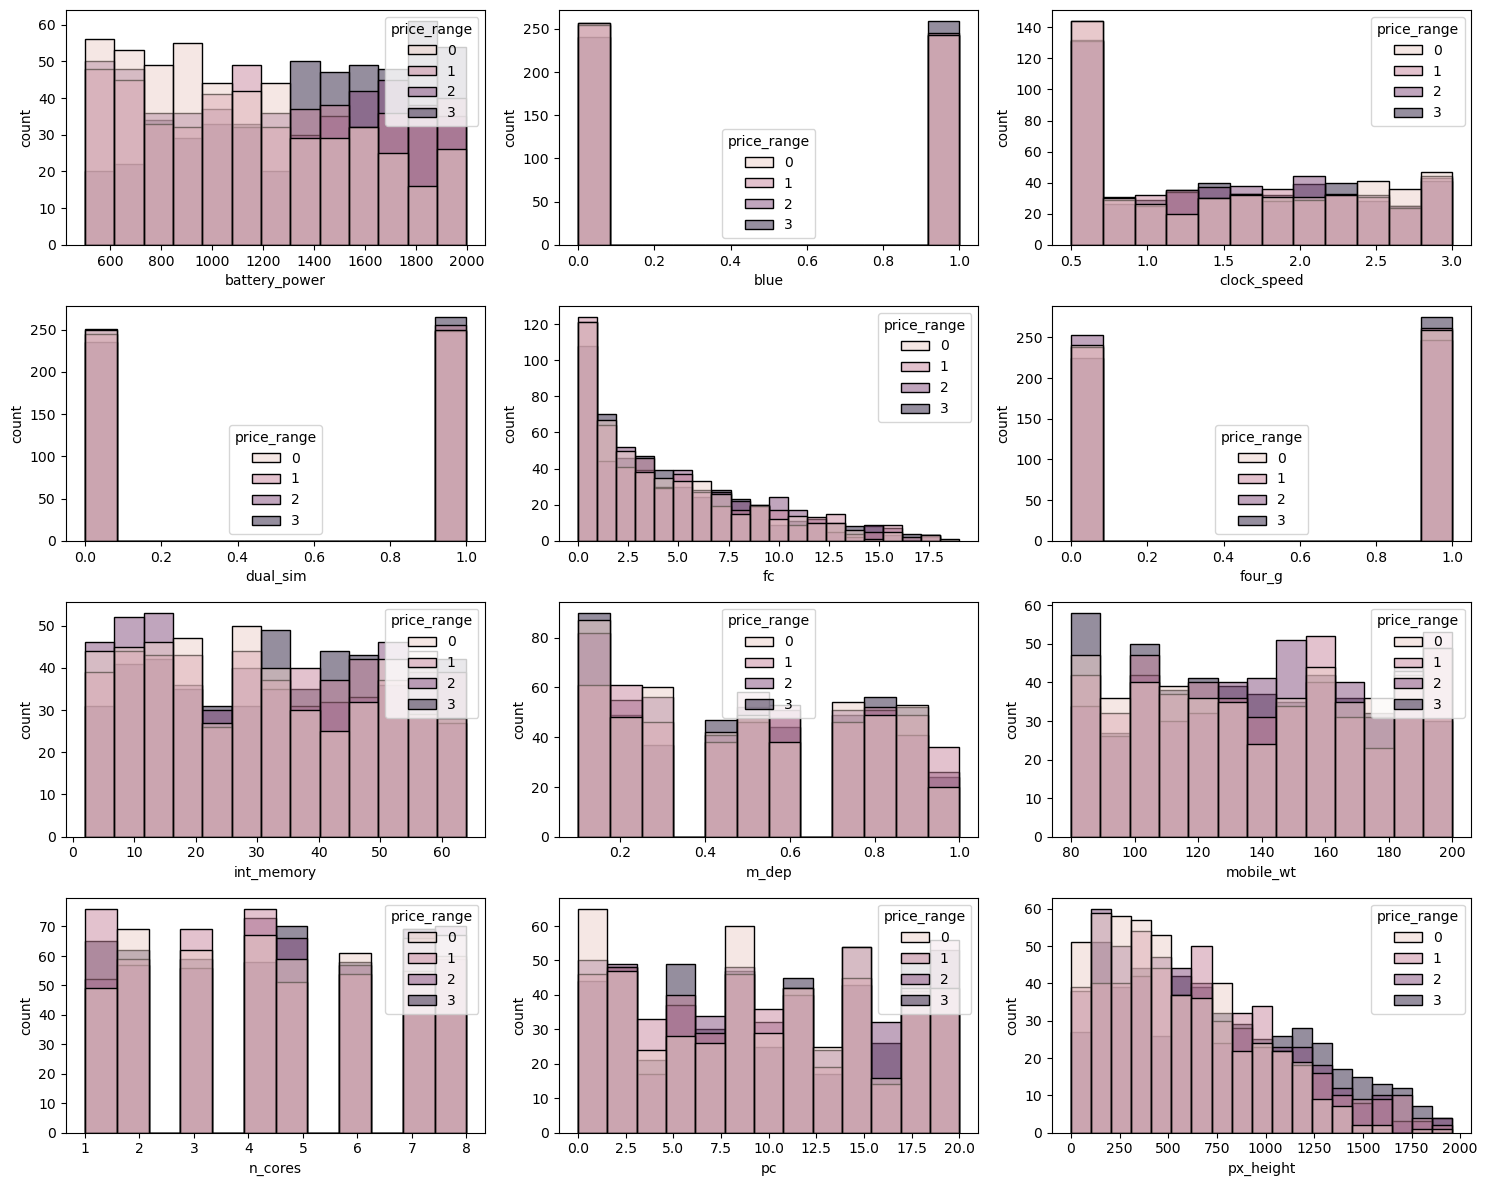

In [19]:
## Bivariate analysis for numerical vs price
plt.figure(figsize=(15, 12),facecolor='white')
plotnumber = 1


for column in data:
     if plotnumber<=12:
        ax = plt.subplot(4,3, plotnumber)
        sns.histplot(x=column,hue='price_range',data=data)
        plt.xlabel(column)
        plt.ylabel("count")
        plotnumber += 1
plt.tight_layout()

## Insights

* The phones which have battery capacity ranging from 1300 mAh to 2000 mAh have the highest price range
* Phones with clock speed between 1.3 to 2.3 have very high cost ,price is high for almost all the clock speeds
* Phones with maximum RAM have the highest price range

## Multivariate analysis

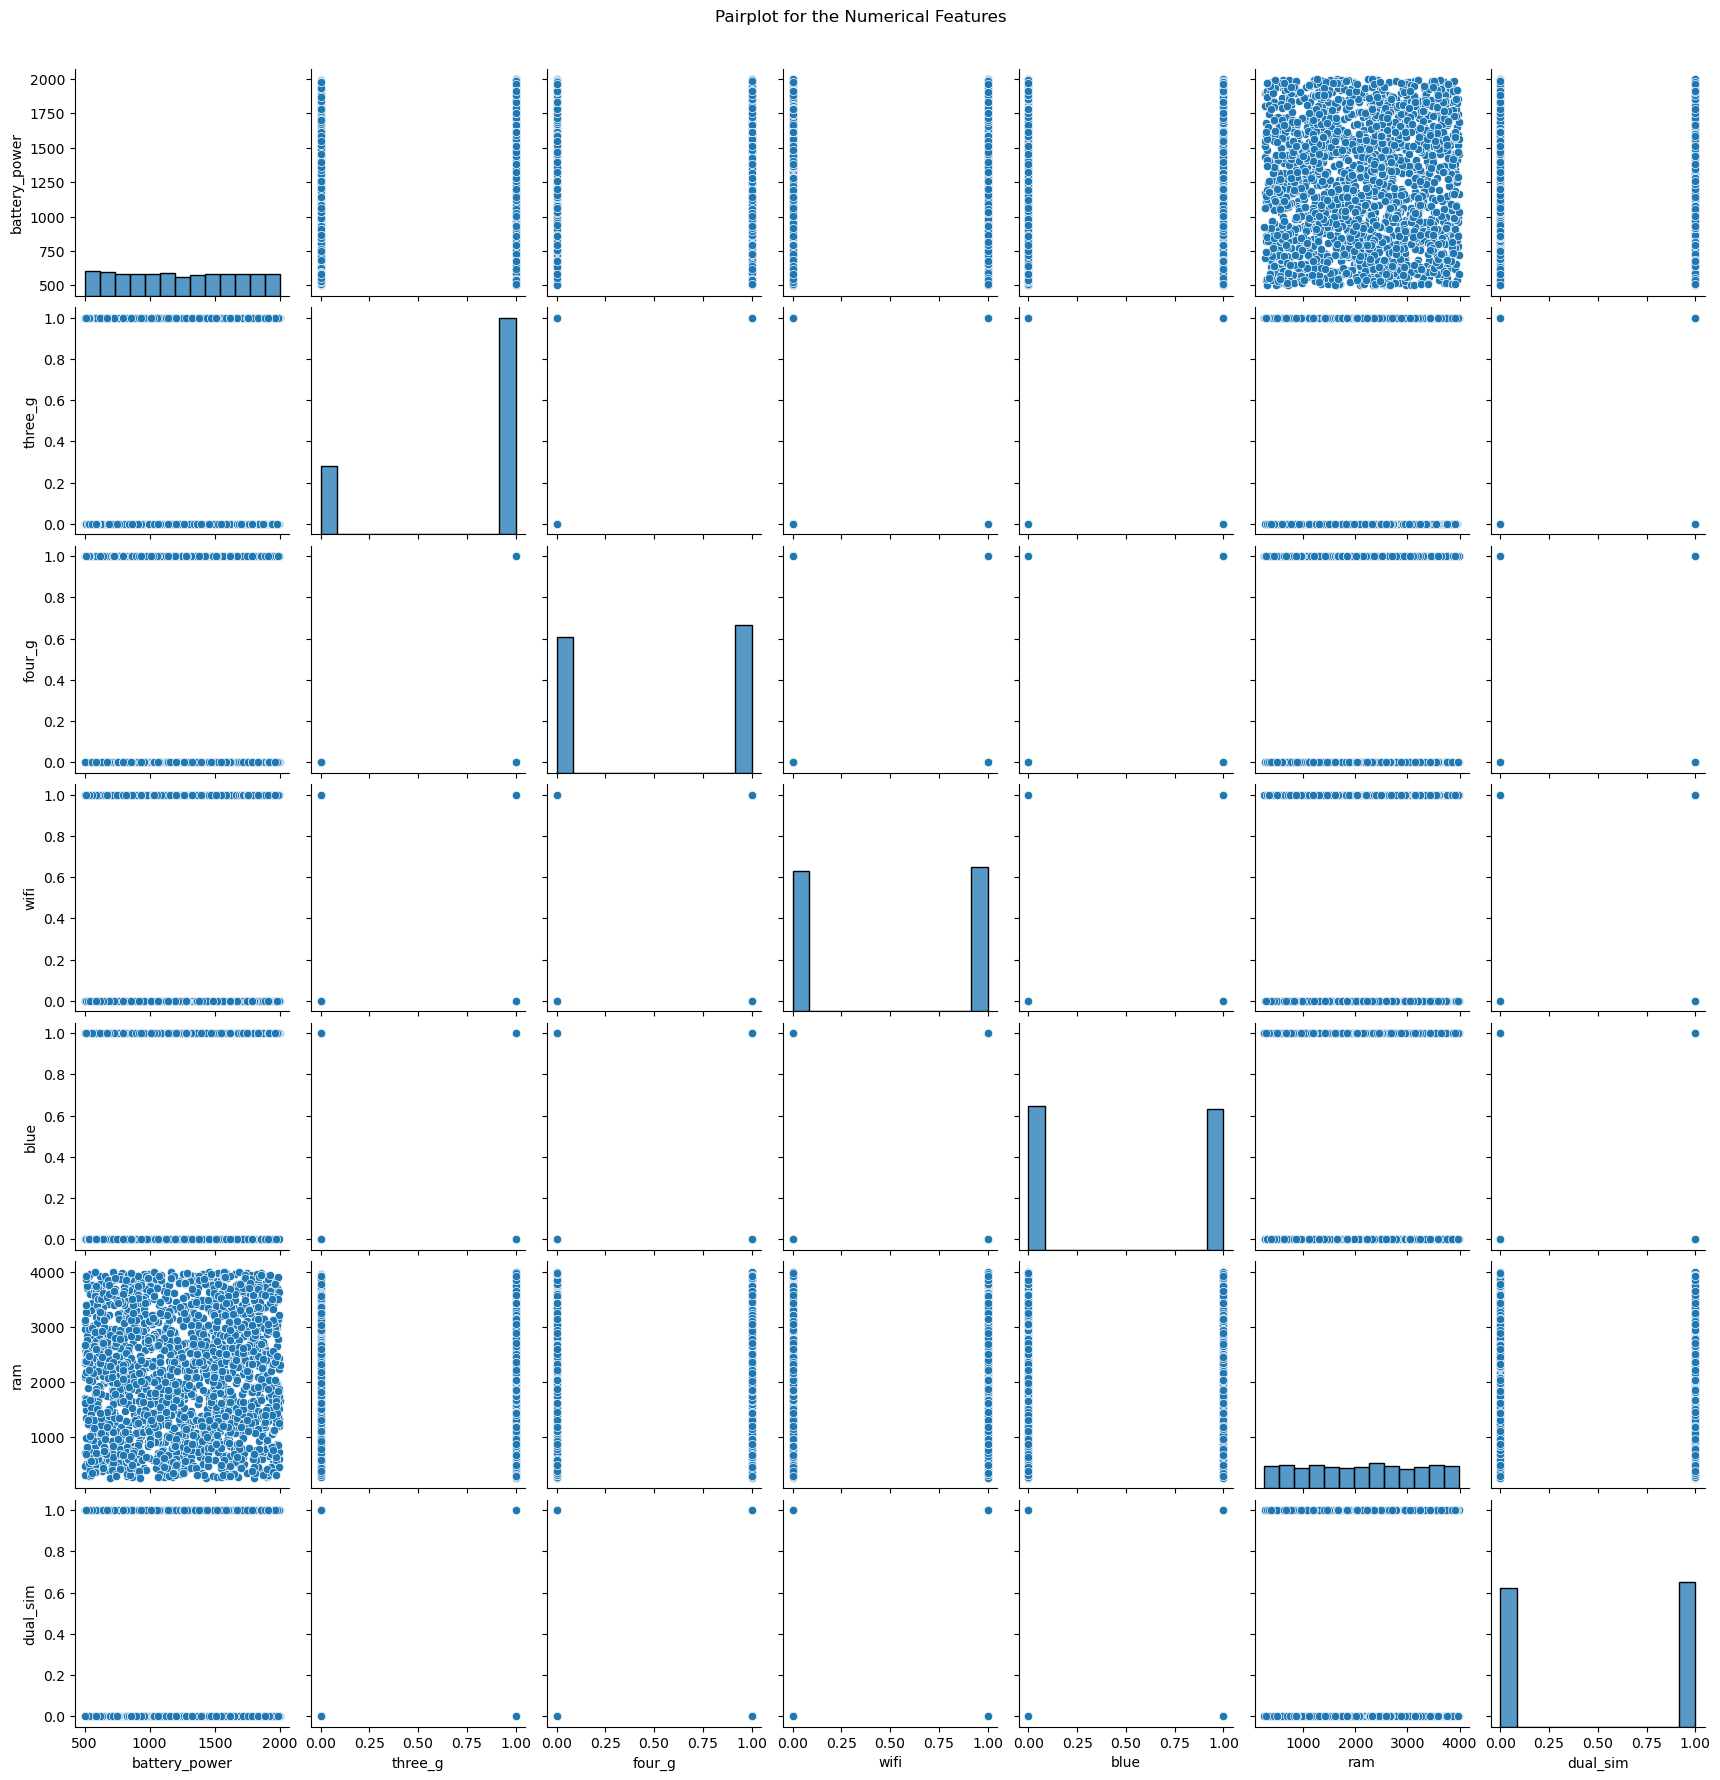

In [20]:
df=['battery_power','three_g','four_g' ,'wifi' ,'blue','ram','dual_sim']
sns.pairplot(data[df])
plt.suptitle('Pairplot for the Numerical Features', y=1.02)
plt.show()

## Data Preprocessing 

### Missing values detection

In [21]:
## Checking missing values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

It has no missing values. Lets check for any outliers

In [22]:
#finding duplicate values
data.duplicated().sum()

0

### Outlier handling

In [23]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


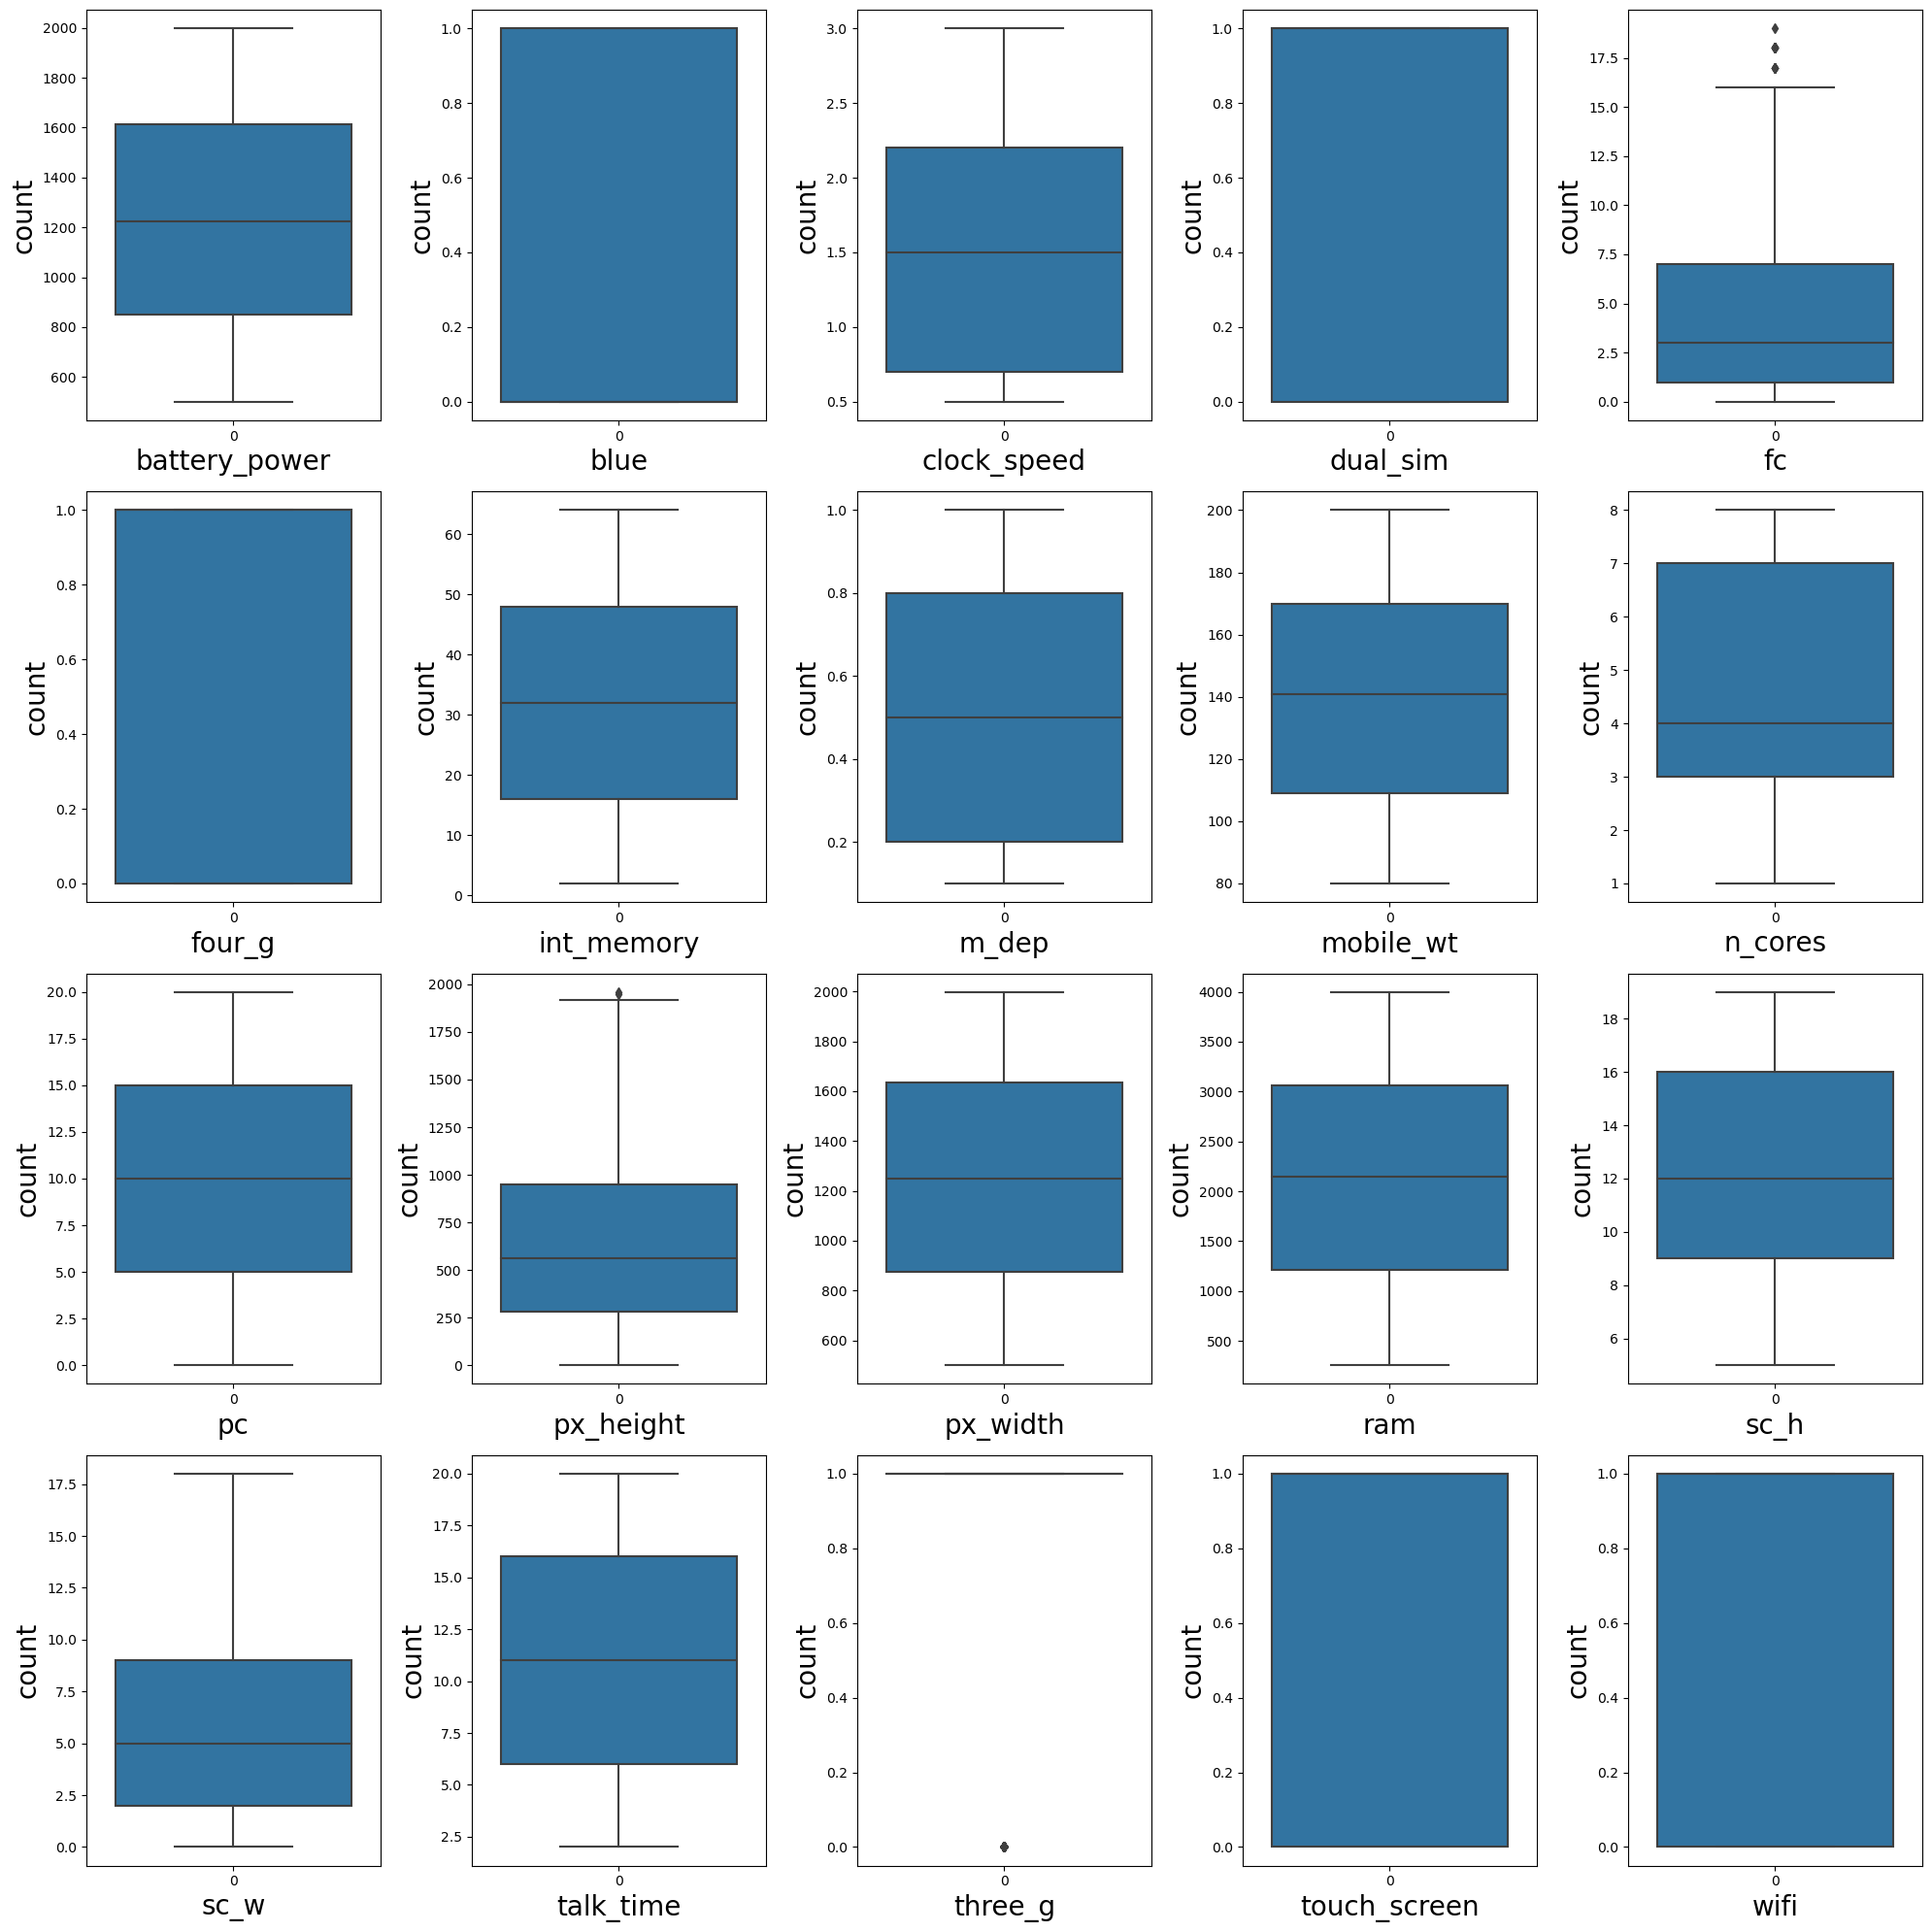

In [24]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<=20:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel("count",fontsize=20)
        plotnumber+=1  
plt.tight_layout()

In [25]:
data.fc.unique()

array([ 1,  0,  2, 13,  3,  4,  5,  7, 11, 12, 16,  6, 15,  8,  9, 10, 18,
       17, 14, 19], dtype=int64)

In [26]:
data.fc.value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

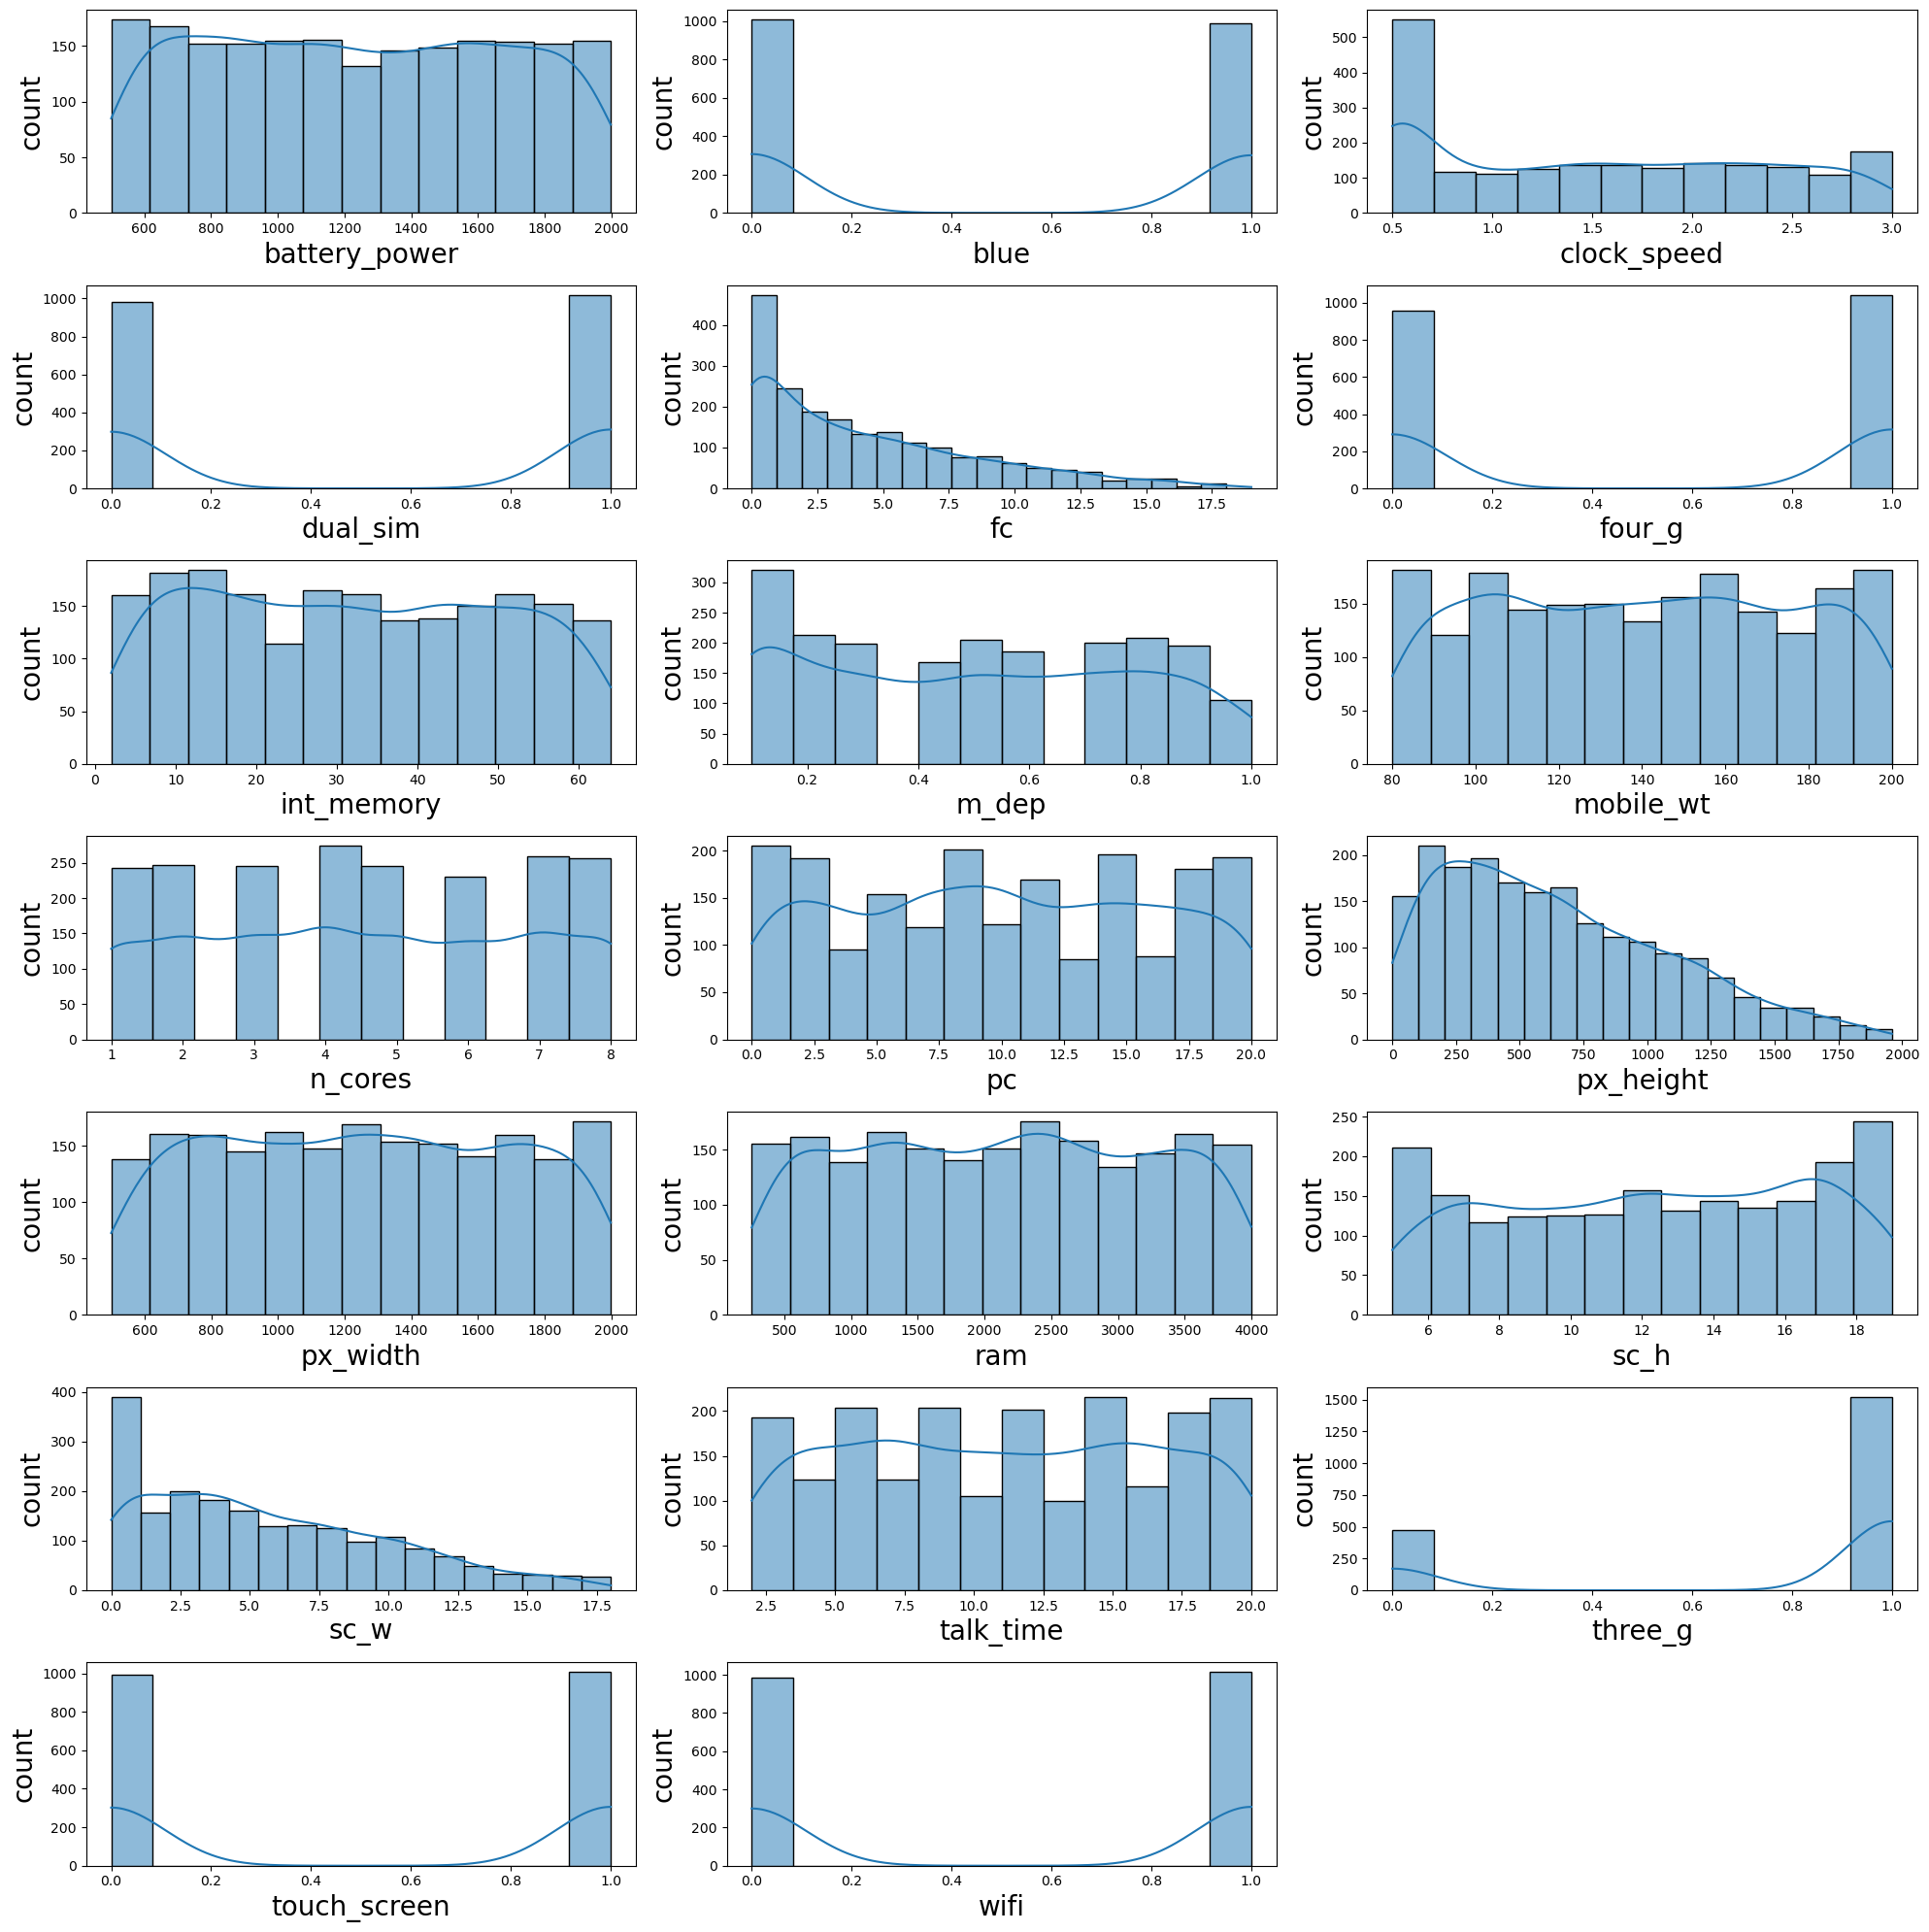

In [27]:
#checking the distribution of the data
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1

for i in data:
    if plotnumber<=20:
        ax=plt.subplot(7,3,plotnumber)
        sns.histplot(x=data[i],kde=True)
        plt.xlabel(i,fontsize=20)
        plt.ylabel("count",fontsize=20)
        plotnumber+=1
plt.tight_layout()

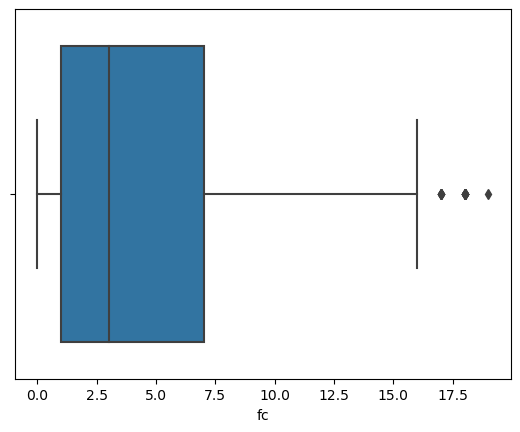

In [28]:
sns.boxplot(x='fc',data=data)
plt.show()

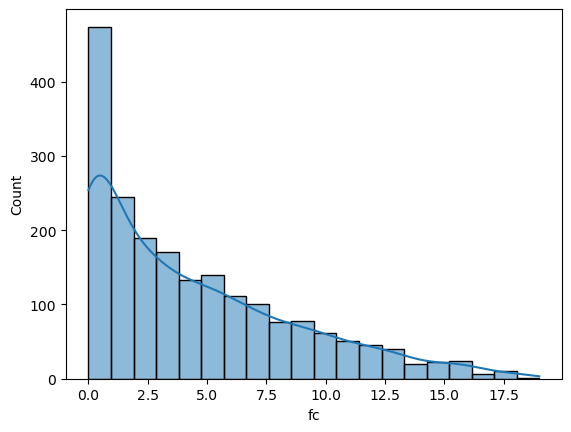

In [29]:
sns.histplot(x='fc',data=data,kde=True)
plt.show()

* The distribution of the fc is positive skewness

In [30]:
#IQR
from scipy import stats
IQR=stats.iqr(data.fc,interpolation='midpoint')
IQR

6.0

In [31]:
Q_1=data.fc.quantile(0.25)
Q_1

1.0

In [32]:
Q_3=data.fc.quantile(0.75)
Q_3

7.0

In [33]:
lower_limit=Q_1-1.5*IQR
lower_limit

-8.0

In [34]:
upper_limit=Q_3+1.5*IQR
upper_limit

16.0

In [35]:
data.loc[data['fc']>16,'fc']=data.fc.median()

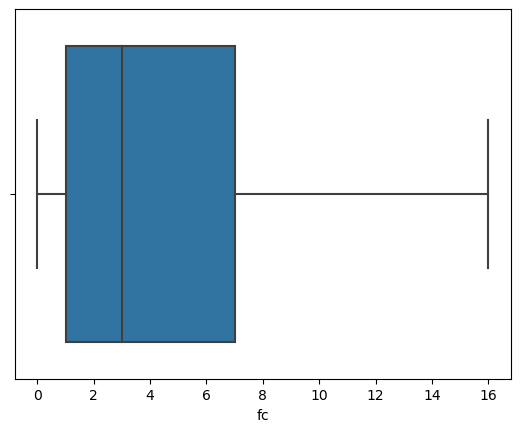

In [36]:
sns.boxplot(x='fc',data=data)
plt.show()

### Scaling data [ Normalization or standardization]

In [37]:
# Minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaling=MinMaxScaler()
data.iloc[:,:-1]=scaling.fit_transform(data.iloc[:,:-1])

In [38]:
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0.227789,0.0,0.68,0.0,0.0625,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0,1
1,0.347361,1.0,0.00,1.0,0.0000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0,2
2,0.041416,1.0,0.00,1.0,0.1250,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0,2
3,0.076152,1.0,0.80,0.0,0.0000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0,2
4,0.881764,1.0,0.28,0.0,0.8125,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.0000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0,0
1996,0.977956,1.0,0.84,1.0,0.0000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0,2
1997,0.941884,0.0,0.16,1.0,0.0625,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0,3
1998,0.675351,0.0,0.16,0.0,0.2500,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0,0


In [39]:
data.iloc[:,:-1]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.227789,0.0,0.68,0.0,0.0625,0.0,0.080645,0.555556,0.900000,0.142857,0.10,0.010204,0.170895,0.612774,0.285714,0.388889,0.944444,0.0,0.0,1.0
1,0.347361,1.0,0.00,1.0,0.0000,1.0,0.822581,0.666667,0.466667,0.285714,0.30,0.461735,0.993324,0.634687,0.857143,0.166667,0.277778,1.0,1.0,0.0
2,0.041416,1.0,0.00,1.0,0.1250,1.0,0.629032,0.888889,0.541667,0.571429,0.30,0.644388,0.811749,0.627205,0.428571,0.111111,0.388889,1.0,1.0,0.0
3,0.076152,1.0,0.80,0.0,0.0000,0.0,0.129032,0.777778,0.425000,0.714286,0.45,0.620408,0.858478,0.671566,0.785714,0.444444,0.500000,1.0,0.0,0.0
4,0.881764,1.0,0.28,0.0,0.8125,1.0,0.677419,0.555556,0.508333,0.142857,0.70,0.616327,0.475300,0.308658,0.214286,0.111111,0.722222,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.195725,1.0,0.00,1.0,0.0000,1.0,0.000000,0.777778,0.216667,0.714286,0.70,0.623469,0.927904,0.110102,0.571429,0.222222,0.944444,1.0,1.0,0.0
1996,0.977956,1.0,0.84,1.0,0.0000,0.0,0.596774,0.111111,0.891667,0.428571,0.15,0.466837,0.977971,0.474613,0.428571,0.555556,0.777778,1.0,1.0,1.0
1997,0.941884,0.0,0.16,1.0,0.0625,1.0,0.548387,0.666667,0.233333,1.000000,0.15,0.442857,0.755674,0.748530,0.285714,0.055556,0.166667,1.0,1.0,0.0
1998,0.675351,0.0,0.16,0.0,0.2500,1.0,0.709677,0.000000,0.541667,0.571429,0.25,0.171429,0.113485,0.163816,0.928571,0.555556,0.944444,1.0,1.0,1.0


## FEATURE ENGINEERING

### Feature Selection

In [40]:
##correlation coefficient
corr = data.corr()

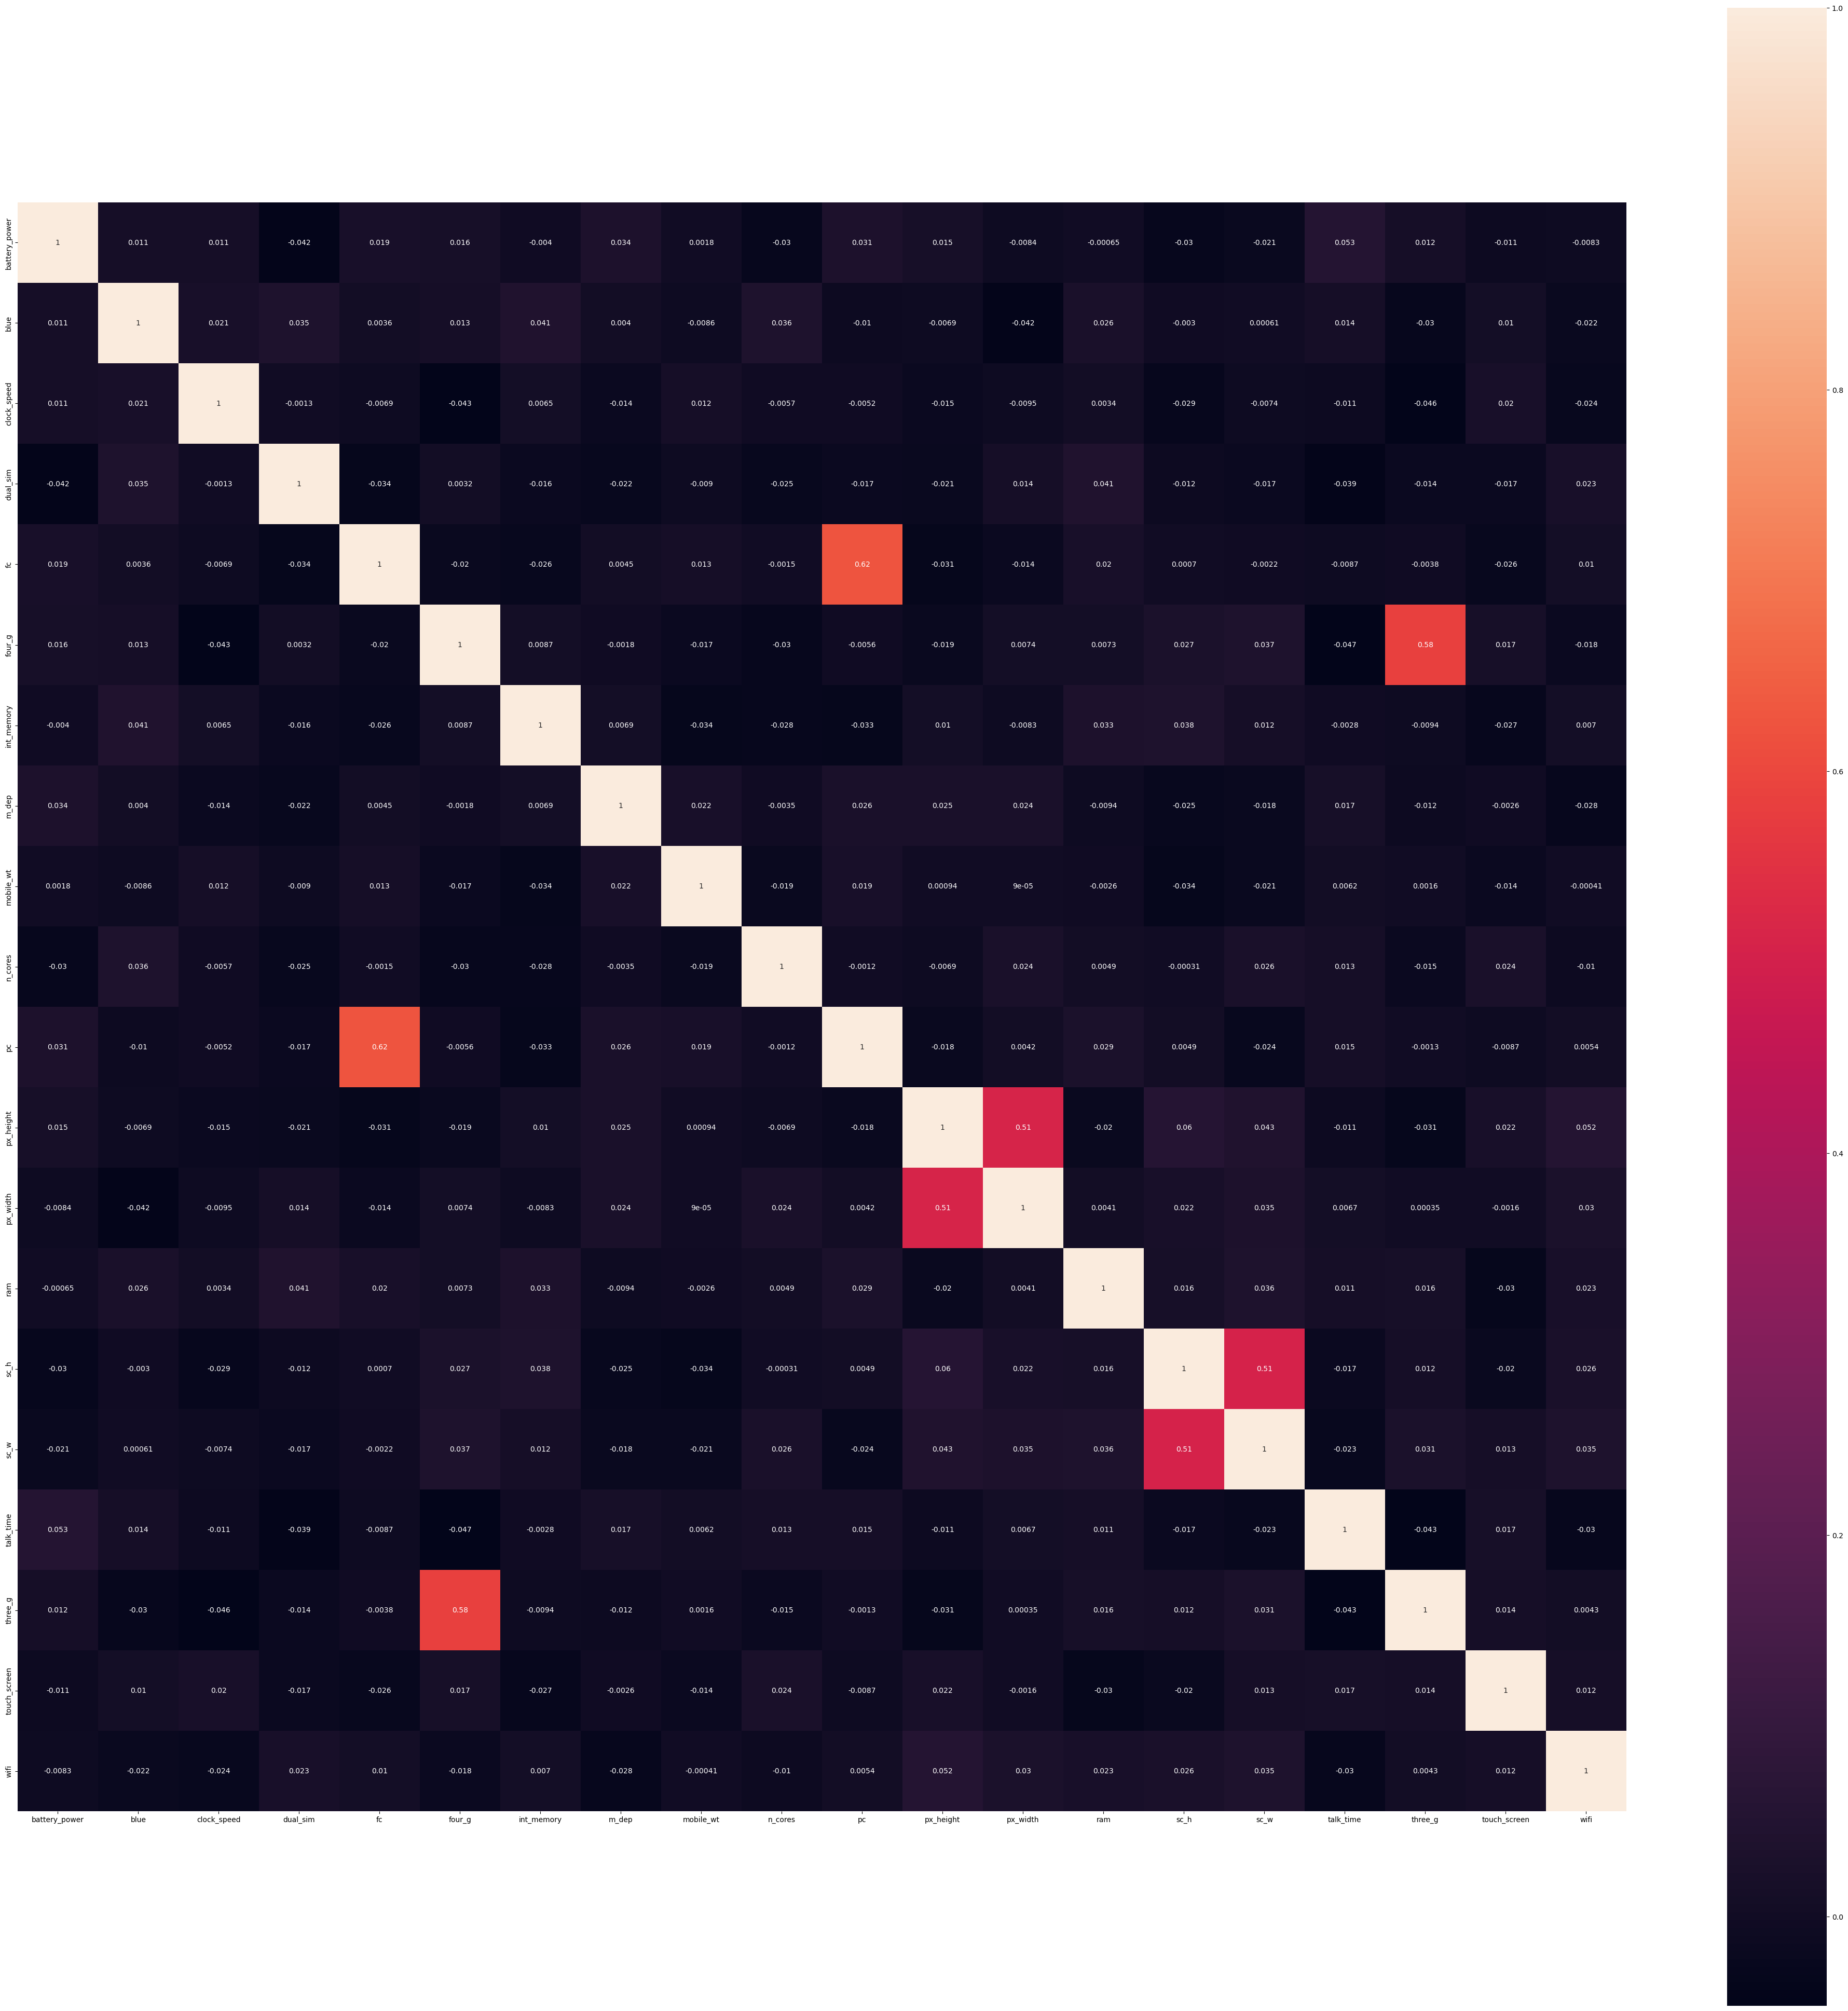

In [41]:
plt.figure(figsize=(50,50),facecolor='White')
sns.heatmap(data.drop('price_range',axis=1).corr(),square= True,annot=True)
plt.show()

In [42]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.018896,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003560,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.006880,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.033595,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.018896,0.003560,-0.006880,-0.033595,1.000000,-0.019929,-0.025671,0.004464,0.013453,-0.001489,0.624363,-0.030611,-0.014033,0.019830,0.000701,-0.002200,-0.008712,-0.003838,-0.025563,0.010491,0.020479
four_g,0.015665,0.013443,-0.043073,0.003187,-0.019929,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.025671,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,0.004464,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.013453,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.001489,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


## Task 2: Predicting Mobile Price Range

## MODEL EVALUATION

### SPLITTING DATA INTO TRAIN AND TEST

In [43]:
# Prepare the data
X = data.drop('price_range', axis=1)
y = data['price_range']

In [44]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. MODELLING WITH LOGISTIC REGRESSION ALGORITHM

In [45]:
# Model Training
# import Logistic regression model
from sklearn.linear_model import LogisticRegression
# initialize the model
model=LogisticRegression()
# train model with x_train,y_train
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
# make predictions using x_test
y_pred=model.predict(X_test)
y_pred

array([0, 2, 1, 3, 1, 1, 2, 0, 3, 1, 0, 0, 2, 3, 3, 2, 3, 3, 1, 0, 0, 1,
       1, 2, 0, 1, 3, 2, 2, 0, 0, 0, 3, 0, 2, 1, 2, 0, 3, 0, 2, 3, 2, 0,
       2, 3, 1, 1, 3, 1, 3, 1, 0, 0, 1, 0, 1, 3, 0, 0, 1, 3, 3, 1, 0, 0,
       3, 3, 1, 2, 2, 3, 0, 1, 2, 0, 1, 3, 2, 2, 3, 1, 1, 0, 1, 3, 1, 3,
       3, 0, 3, 3, 2, 1, 3, 2, 2, 3, 2, 1, 0, 0, 1, 0, 0, 3, 2, 0, 1, 1,
       0, 0, 3, 1, 3, 2, 3, 3, 0, 2, 1, 3, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0,
       2, 2, 0, 3, 1, 0, 0, 2, 3, 1, 3, 2, 0, 0, 0, 1, 2, 2, 3, 1, 1, 0,
       2, 2, 0, 1, 0, 2, 2, 3, 3, 3, 1, 0, 0, 2, 2, 2, 3, 0, 1, 0, 3, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 1, 3, 3, 1, 0, 1,
       1, 1, 1, 2, 2, 3, 3, 3, 1, 2, 0, 0, 0, 2, 1, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 3, 0, 0, 2, 1, 3, 0, 1, 1, 0, 1, 3, 2, 0, 1, 2, 3, 0, 1, 3,
       2, 3, 0, 3, 1, 2, 3, 3, 2, 1, 0, 3, 3, 1, 3, 3, 3, 3, 3, 0, 1, 2,
       2, 2, 2, 0, 2, 3, 2, 2, 2, 1, 0, 2, 0, 3, 3, 1, 3, 1, 0, 3, 1, 2,
       0, 0, 3, 0, 1, 2, 3, 3, 3, 1, 1, 0, 1, 3, 3,

In [47]:
dx=y_test.copy

In [48]:
dx

<bound method NDFrame.copy of 1860    0
353     2
1333    1
905     3
1289    1
       ..
965     3
1284    2
1739    1
261     1
535     2
Name: price_range, Length: 400, dtype: int64>

In [49]:
#Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test, y_pred)

In [50]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[105,   0,   0,   0],
       [  1,  86,   4,   0],
       [  0,   9,  77,   6],
       [  0,   0,   4, 108]], dtype=int64)

In [51]:
#training accuracy
accuracy_score(y_test,y_pred)

0.94

In [52]:
# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       0.91      0.95      0.92        91
           2       0.91      0.84      0.87        92
           3       0.95      0.96      0.96       112

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [53]:
# print confusion matrix
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3
price_range,,,,
0,105,0,0,0
1,1,86,4,0
2,0,9,77,6
3,0,0,4,108


### 2.MODELLING WITH SUPPORT VECTOR MACHINE 

In [54]:
!pip install imblearn

In [55]:
# Install imblearn package - pip install imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [56]:
# Smote is always applied on train data(x_train and y_train)
X_smote, y_smote = smote.fit_resample(X_train,y_train)

In [57]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 409, 2: 408, 0: 395, 3: 388})
SMOTE Classes Counter({1: 409, 2: 409, 0: 409, 3: 409})


In [58]:
# Support Vector Classifier Model
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_smote, y_smote)

SVC()

In [59]:
# Predict output for X_test
y_pred=svclassifier.predict(X_test)

In [60]:
## evaluating the model created
from sklearn.metrics import accuracy_score,precision_score,classification_report
acc=accuracy_score(y_test,y_pred)
acc

0.86

In [61]:
# Classification report measures the quality of predictions. True Positives, False Positives, True negatives and False Negatives
# are used to predict the metrics of a classification report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       105
           1       0.79      0.85      0.82        91
           2       0.76      0.77      0.77        92
           3       0.93      0.87      0.90       112

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



In [62]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(svclassifier,X,y,cv=3,scoring='accuracy')
print(scores)
print("cross validation score",scores.mean())
print("standard deviation",scores.std())
# std <0.05 , then model is good otherwise bad model.

[0.82158921 0.87256372 0.82132132]
cross validation score 0.8384914149531841
standard deviation 0.024093004847296512


### 3.MODELLING WITH DECISION TREE

In [63]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_smote,y_smote)
# prediction with x_test
y_pred=model.predict(X_test)
# predictions with x_train
y_train_predict=model.predict(X_train)

In [64]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [65]:
# training accuracy
accuracy_score(y_train,y_train_predict)

1.0

In [66]:
# testing accuracy
accuracy_score(y_test,y_pred)

0.835

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       105
           1       0.74      0.85      0.79        91
           2       0.78      0.70      0.74        92
           3       0.87      0.91      0.89       112

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.83       400



### 4. RANDOM FOREST ALGORITHM

In [68]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# Model Training
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

In [71]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.89


In [72]:
# Print classification report for more detailed evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       105
           1       0.88      0.84      0.86        91
           2       0.78      0.89      0.83        92
           3       0.96      0.86      0.91       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [73]:
# Print confusion matrix 
pd.crosstab(y_test,y_pred)

col_0,0,1,2,3
price_range,,,,
0,101,4,0,0
1,8,76,7,0
2,0,6,82,4
3,0,0,16,96


* Model is overfitting because training score is high and testing score is less.
* To overcome overfitting we do hyperparameter tuning

### Hyperparameter Tuning

In [ ]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
# hyperparameter tuning
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',
                           param_distributions=random_grid, n_iter=100, cv=3,
                               verbose=2, random_state=42, n_jobs=-1)
rf_cv.fit(X_smote, y_smote)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_clf2 = RandomForestClassifier(n_estimators= 100, min_samples_split=2, min_samples_leaf= 1, max_features='auto', max_depth=20, bootstrap=False)#passing best parameter to randomforest
rf_clf2.fit(X_smote,y_smote)
y_predict=rf_clf2.predict(X_test)

In [ ]:
# predicting training data to check training performance
y_train_pred=rf_clf2.predict(X_train)
y_train_pred

In [ ]:
# testing accuracy
accuracy_score(y_test,y_predict)

In [ ]:
# training accuracy 
accuracy_score(y_train,y_train_pred)

In [ ]:
print(classification_report(y_train,y_train_pred))

# Conclusion : - 

**Based on the accuracy scores you've provided for different models, it appears that the Random Forest model achieved the highest accuracy score of 1.00 (100%) on the dataset. This indicates that the Random Forest model was able to perfectly classify all instances in the dataset. However, as mentioned earlier, achieving perfect accuracy could raise concerns about potential overfitting. It's important to carefully validate the model's performance on unseen data or using techniques like cross-validation to ensure that the high accuracy is not solely due to overfitting.**

###### Here's a summary of the accuracy scores for the models you mentioned:

* 1)Logistic Regression: 0.94 (94%)
* 2)Support Vector Machine (SVM): 0.86 (86%)
* 3)Decision Tree: 0.84 (84%)
* 4)Random Forest: 1.00 (100%)


**In your report, you can present the accuracy scores along with a brief description of each model and their respective performance. You should also mention that achieving 100% accuracy could indicate potential overfitting and the importance of further validation and testing on unseen data.**

###### Your conclusion could emphasize the following points:

* Compare the performance of different models based on accuracy scores.
* Highlight that the Random Forest model achieved the highest accuracy of 100%, but caution against potential overfitting.
* Emphasize the need for thorough validation and testing on new data to ensure the model's generalization capability.
* Consider discussing other evaluation metrics, such as precision, recall, and F1-score, to provide a more comprehensive assessment of model performance.
* Mention any limitations of the dataset or modeling approach that could impact the results.
* Remember, accuracy is just one aspect of model evaluation, and a comprehensive evaluation should take into account various factors, including potential bias, robustness, interpretability, and real-world applicability.